## Simple Statistics
Empyrical computes basic metrics from returns and volatility to alpha and beta, Value at Risk, and Shorpe or Sortino ratios.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import empyrical as ep

In [3]:
# replace with stock or portfolio returns and appropriate benchmark
returns = np.array([.01, .02, .03, -.4, -.06, -.02])
benchmark_returns = np.array([.02, .02, .03, -.35, -.05, -.01])

# calculate the max drawdown
max_dd = ep.max_drawdown(returns)
print(max_dd)


# calculate alpha and beta
alpha, beta = ep.alpha_beta(returns, benchmark_returns)

print(alpha, beta)

-0.4472800000000001
-0.7960672549836803 1.1243025418474892


## Rolling Measures¶
Empyrical also aggregates returna nd risk metrics for rolling windows:

In [4]:
returns = np.array([.01, .02, .03, -.4, -.06, -.02])

# calculate the rolling max drawdown
ep.roll_max_drawdown(returns, window=3)

array([ 0.     , -0.4    , -0.436  , -0.44728])

## Pandas Support

Empyrical also works with both NumPy arrays and Pandas data structures:

In [5]:
returns = pd.Series([.01, .02, .03, -.4, -.06, -.02])
factor_returns = pd.Series([.02, .01, .03, -.01, -.02, .02])

# calculate a capture ratio
ep.capture(returns, factor_returns)

-0.147387712263491

## Fama-French Risk Factors
Empyrical downloads Fama-French risk factors from 1970 onward:

In [6]:
risk_factors = ep.utils.get_fama_french()

risk_factors.head().append(risk_factors.tail())

/var/folders/5j/6vs4zprx4fqcwl49nsw0hzqc0000gn/T/ipykernel_45274/3535964830.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  risk_factors.head().append(risk_factors.tail())


,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1970-01-02 00:00:00+00:00,0.0118,0.0129,0.0101,0.00029,-0.0340
1970-01-05 00:00:00+00:00,0.0059,0.0067,0.0072,0.00029,-0.0153
1970-01-06 00:00:00+00:00,-0.0074,0.0010,0.0021,0.00029,0.0038
1970-01-07 00:00:00+00:00,-0.0015,0.0040,-0.0033,0.00029,0.0011
1970-01-08 00:00:00+00:00,0.0004,0.0018,-0.0017,0.00029,0.0033
2022-09-26 00:00:00+00:00,-0.0102,0.0017,-0.0075,0.00009,0.0073
2022-09-27 00:00:00+00:00,-0.0005,0.0063,-0.0093,0.00009,-0.0013
2022-09-28 00:00:00+00:00,0.0215,0.0090,-0.0033,0.00009,-0.0138
2022-09-29 00:00:00+00:00,-0.0217,-0.0046,0.0086,0.00009,0.0085


## Asset Prices and Benchmark Returns
Empyrical yfinance to download price data from Yahoo! Finance. To obtain the S&P returns since 1950, use:

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0.98, 'Daily S&P 500 Returns')

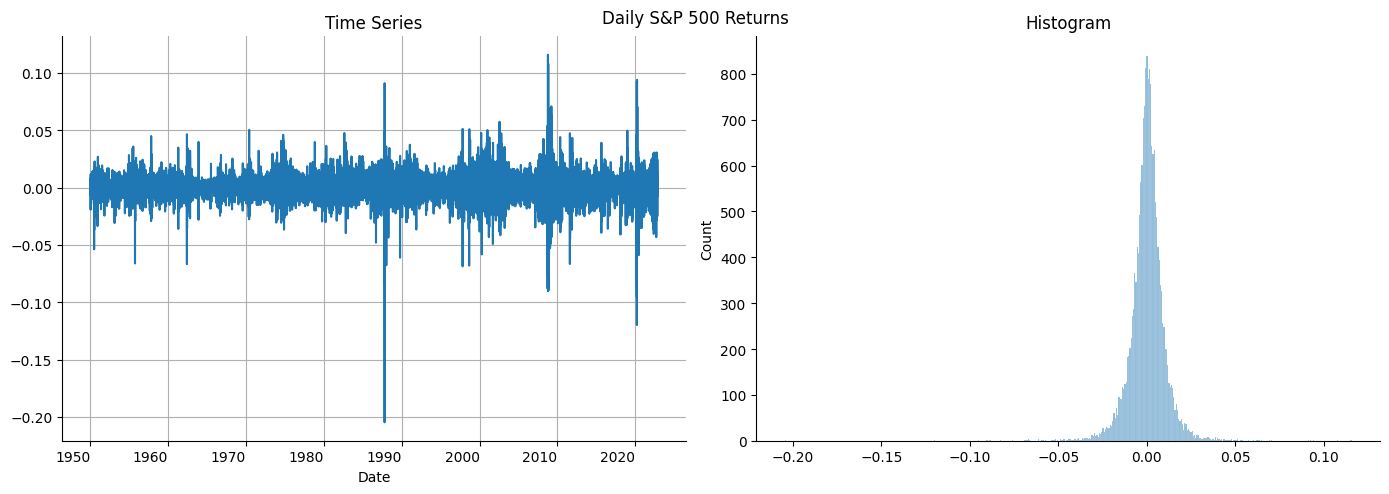

In [7]:
symbol = '^GSPC'
returns = ep.utils.get_symbol_returns_from_yahoo(
    symbol,
    start='1950-01-01'
)


fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

with sns.axes_style('whitegrid'):
    returns.plot(ax=axes[0], rot=0, title='Time Series', legend=False)
    sns.histplot(returns, ax=axes[1], legend=False)
axes[1].set_title('Histogram')
sns.despine()
plt.tight_layout()
plt.suptitle('Daily S&P 500 Returns')